#  India's Population Growth [1960-2023]
---

##  Task Introduction
This is the first internship task assigned by SkillCraft Technology. The goal is to create a visualization (bar chart or histogram) that represents the distribution of a categorical or continuous variable. In this notebook, we focus on **India’s population growth from 1960 to 2023**, a continuous variable, and present it using a bar chart.

---


##  Objective
- Load and clean population data from the World Bank dataset.
- Filter for India’s population from 1960 to 2023.
- Create a meaningful and clean visualization.
- Extract insights and highlight key population milestones.

---


##  Table of Contents
1. [Importing Libraries](#1-importing-libraries)
2. [Loading the Dataset](#2-load-the-dataset)
3. [Filtering for India](#3-filter-for-india-only)
4. [Reshaping the Data](#4-reshape-data-years-as-rows)
5. [Plotting the Bar Chart](#5-plot-the-bar-chart)
6. [Summary Statistics](#6-summary-statistics)
7. [Plotting the Bar Chart](#7-plot-the-bar-chart)
8. [Key Insights](#6-key-insights)
9. [Conclusion](#7-conclusion)

---

### Importing the required Libraries

In this block  we will import the required libraries for the task in hand.

 Required  libraries: `pandas` for data handling and `matplotlib.pyplot` for plotting the chart and `seaborn` for enhanced visuals.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load the datset
 Next we load the datset for furthur processing and visualization.
 
Dataset Used:"Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_131993.csv"

In [2]:
# Load the dataset
df= pd.read_csv('API_SP.POP.TOTL_DS2_en_csv_v2_131993.csv', skiprows=4)

# Basic Info
df.info()

# Display Dataset
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 70 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            264 non-null    float64
 5   1961            264 non-null    float64
 6   1962            264 non-null    float64
 7   1963            264 non-null    float64
 8   1964            264 non-null    float64
 9   1965            264 non-null    float64
 10  1966            264 non-null    float64
 11  1967            264 non-null    float64
 12  1968            264 non-null    float64
 13  1969            264 non-null    float64
 14  1970            264 non-null    float64
 15  1971            264 non-null    float64
 16  1972            264 non-null    float64
 17  1973            264 non-null    flo

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54922.0,55578.0,56320.0,57002.0,57619.0,58190.0,...,108727.0,108735.0,108908.0,109203.0,108587.0,107700.0,107310.0,107359.0,NaN,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130072080.0,133534923.0,137171659.0,140945536.0,144904094.0,149033472.0,...,623369401.0,640058741.0,657801085.0,675950189.0,694446100.0,713090928.0,731821393.0,750503764.0,NaN,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,9035043.0,9214083.0,9404406.0,9604487.0,9814318.0,10036008.0,...,34700612.0,35688935.0,36743039.0,37856121.0,39068979.0,40000412.0,40578842.0,41454761.0,NaN,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97630925.0,99706674.0,101854756.0,104089175.0,106388440.0,108772632.0,...,429454743.0,440882906.0,452195915.0,463365429.0,474569351.0,485920997.0,497387180.0,509398589.0,NaN,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5231654.0,5301583.0,5354310.0,5408320.0,5464187.0,5521981.0,...,29183070.0,30234839.0,31297155.0,32375632.0,33451132.0,34532429.0,35635029.0,36749906.0,NaN,NaN


### Data Filtering

Filters the dataset to include only rows for **India**.


In [3]:
# Filter Data
India_data = df[df['Country Name'] == 'India']

### Reshape Data

Transforms the data so that each row corresponds to a year and its population. This is useful for plotting time-series data.


In [4]:
# Reshape Data
India_population = India_data.loc[:, '1960':'2023'].T
India_population.columns = ['Population']
India_population.index.name = 'Year'
India_population.reset_index(inplace=True)
India_population['Year'] = India_population['Year'].astype(int)

### Data Overview

Displays the first few rows of the cleaned dataset to give a quick overview of the structure and content.


In [5]:
India_population.head()

,Year,Population
0,1960,435990338.0
1,1961,446564729.0
2,1962,457283090.0
3,1963,468138575.0
4,1964,479229598.0


### Summary Statistics

Provides basic statistical insights like mean, min, max, and standard deviation of the population values.


In [6]:
India_population['Population'].describe()

count    6.400000e+01
mean     9.120551e+08
std      3.175137e+08
min      4.359903e+08
25%      6.222238e+08
50%      8.934423e+08
75%      1.194990e+09
max      1.438070e+09
Name: Population, dtype: float64

### Plotting  Bar Chart 

Generates a bar chart that displays how India’s population has changed over time. Annotates the milestone where it crossed 1 billion.


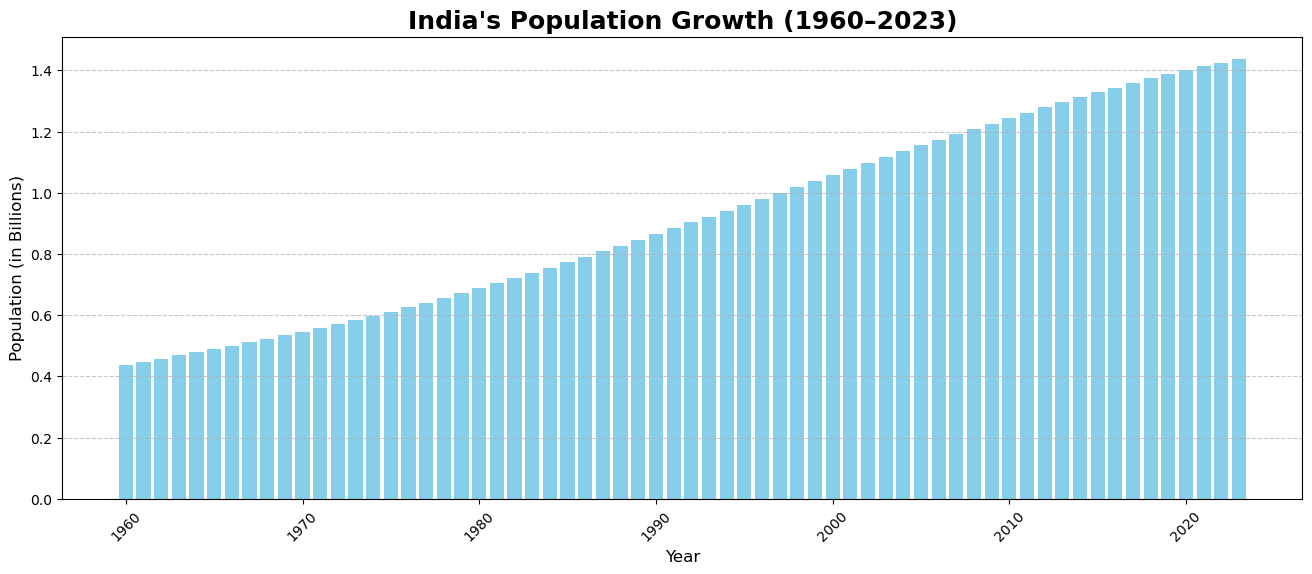

In [7]:
plt.figure(figsize=(16, 6))
plt.bar(India_population['Year'], India_population['Population'] / 1e9, color='skyblue')
plt.title("India's Population Growth (1960–2023)", fontsize=18, fontweight='bold')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Population (in Billions)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

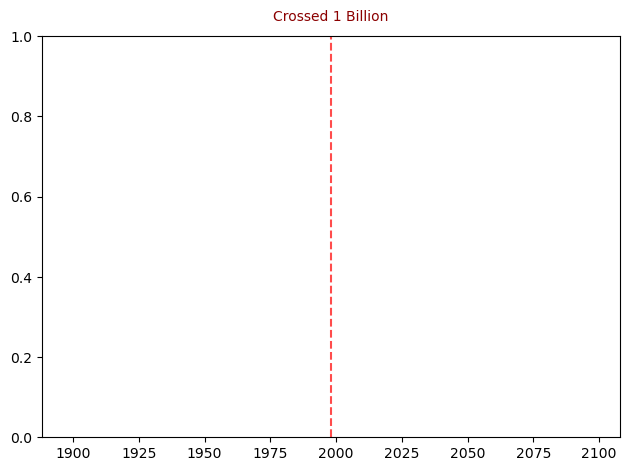

In [8]:
# Milestone Annotation
milestone_year = 1998
milestone_pop = India_population[India_population['Year'] == milestone_year]['Population'].values[0] / 1e9
plt.text(milestone_year, milestone_pop + 0.02, 'Crossed 1 Billion', color='darkred', ha='center')
plt.axvline(x=milestone_year, color='red', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [9]:
India_population.to_csv("India_Population_1960_2023.csv", index=False)

# VISUALIZATION

### Importing thhe dataset

In [11]:
import pandas as pd

# Load your dataset (make sure the file is in the same folder as your notebook)
df = pd.read_csv("India_Population_1960_2023.csv")
df.head()


,Year,Population
0,1960,435990338.0
1,1961,446564729.0
2,1962,457283090.0
3,1963,468138575.0
4,1964,479229598.0


### Data Cleaning

In [22]:
# Check for nulls
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         64 non-null     int64  
 1   Population   64 non-null     float64
 2   Growth_Rate  63 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.6 KB


Year           0
Population     0
Growth_Rate    1
dtype: int64

### Visualization

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


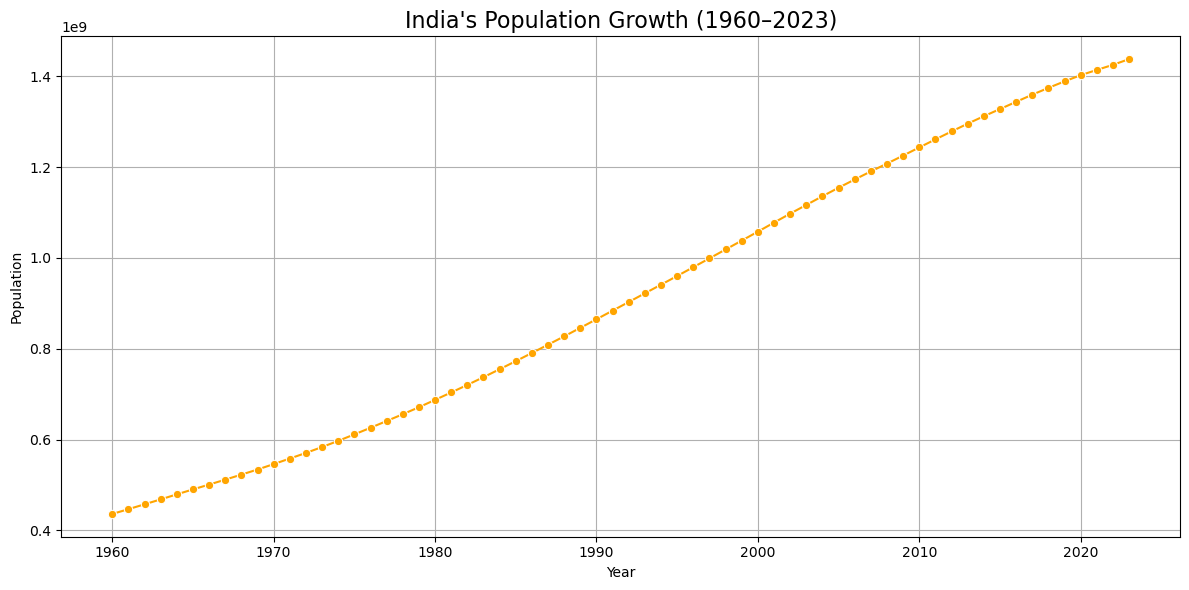

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.lineplot(x='Year', y='Population', data=df, marker='o', color='orange')
plt.title("India's Population Growth (1960–2023)", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Population")
plt.grid(True)
plt.tight_layout()
plt.show()


In [18]:
#Calculating growth rate
df['Growth_Rate'] = df['Population'].pct_change() * 100
df[['Year', 'Population', 'Growth_Rate']].tail()


,Year,Population,Growth_Rate
59,2019,1.389030e+09,1.045441
60,2020,1.402618e+09,0.978192
61,2021,1.414204e+09,0.826041
62,2022,1.425423e+09,0.793331
63,2023,1.438070e+09,0.887202


## Key Insights

 - India’s population grew from ~0.45B in 1960 to ~1.44B in 2023
 - Fastest growth occurred between 1980s to 2000s
 - Crossed 1 billion milestone around 1998
 - Growth appears to be slowing down slightly in recent years
 - India has surpassed China as the most populous country in 2023


## Conclusion

- This chart shows how India’s population has grown explosively over the decades,

- underlining key demographic trends that carry massive implications for economics, urban planning,

- healthcare, and education. With signs of slowing growth, India enters a new demographic chapter.